In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Load the dataset

In [33]:
file_path = "Amazon Sale Report.csv"  
data = pd.read_csv(file_path)

# Convert 'Date' to datetime format

In [34]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Clean and preprocess

In [35]:
sales_data = data.dropna(subset=['Date', 'Amount'])
sales_data['Month'] = sales_data['Date'].dt.month  # Convert to numeric month
sales_data['Year'] = sales_data['Date'].dt.year

C:\Users\seaan\AppData\Local\Temp\ipykernel_170148\3300620832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Month'] = sales_data['Date'].dt.month  # Convert to numeric month
C:\Users\seaan\AppData\Local\Temp\ipykernel_170148\3300620832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Year'] = sales_data['Date'].dt.year


# 1. Sales Overview: Daily, Monthly, and Yearly Sales Trends
# Aggregate sales data

In [36]:
daily_sales = sales_data.groupby('Date')['Amount'].sum().reset_index()
monthly_sales = sales_data.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
yearly_sales = sales_data.groupby('Year')['Amount'].sum().reset_index()

# Plotting Daily Sales Trend

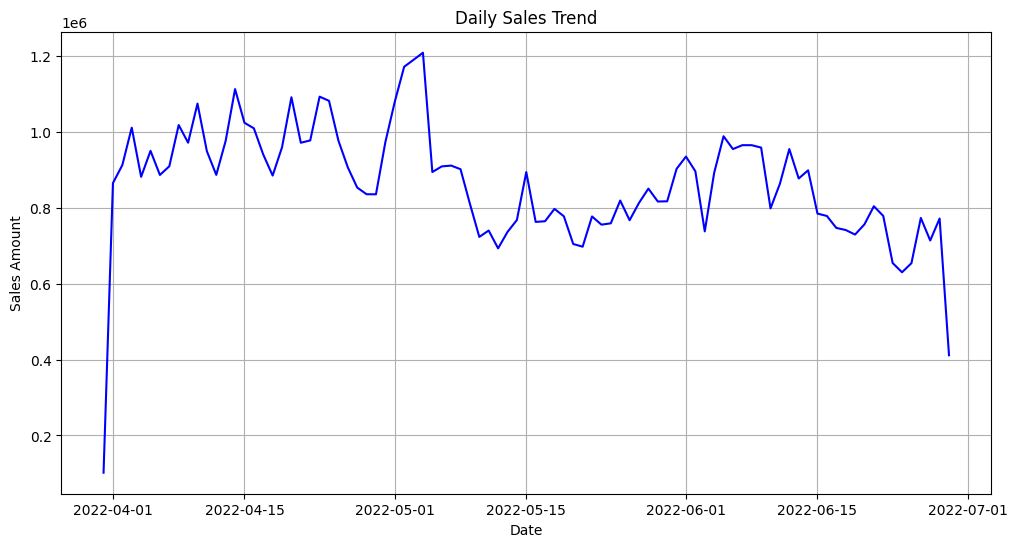

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], label='Daily Sales', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid()
plt.show()

# Plotting Monthly Sales Trend

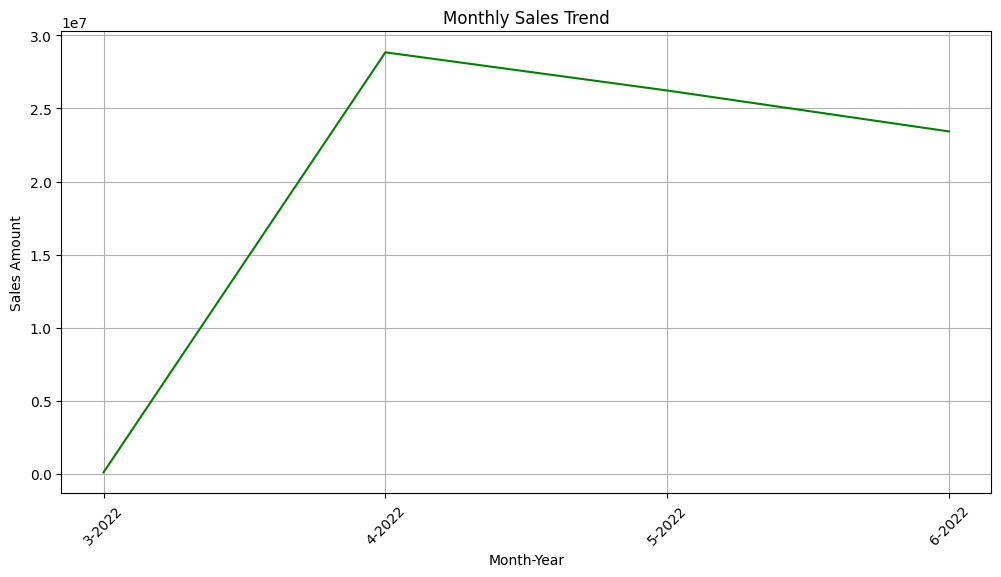

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str), monthly_sales['Amount'], label='Monthly Sales', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plotting Yearly Sales Trend

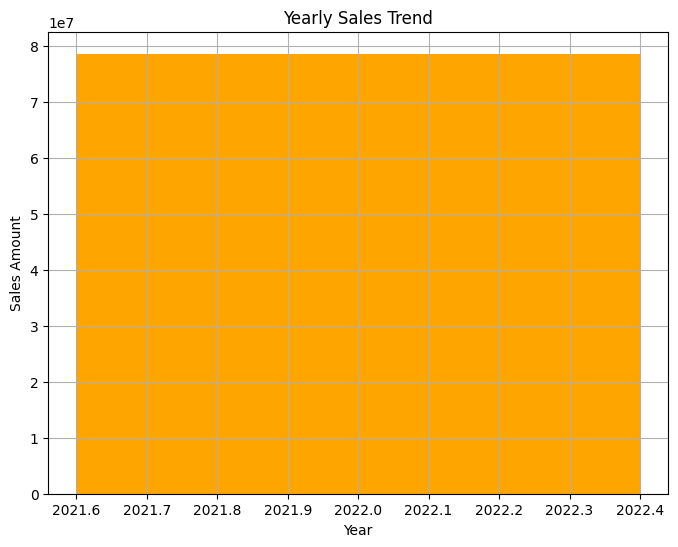

In [39]:
plt.figure(figsize=(8, 6))
plt.bar(yearly_sales['Year'], yearly_sales['Amount'], color='orange')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.grid()
plt.show()

# 2. Product Analysis
# Analyze product categories and sizes

In [40]:
product_analysis = sales_data.groupby('Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
size_analysis = sales_data.groupby('Size')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Visualization of Product Categories

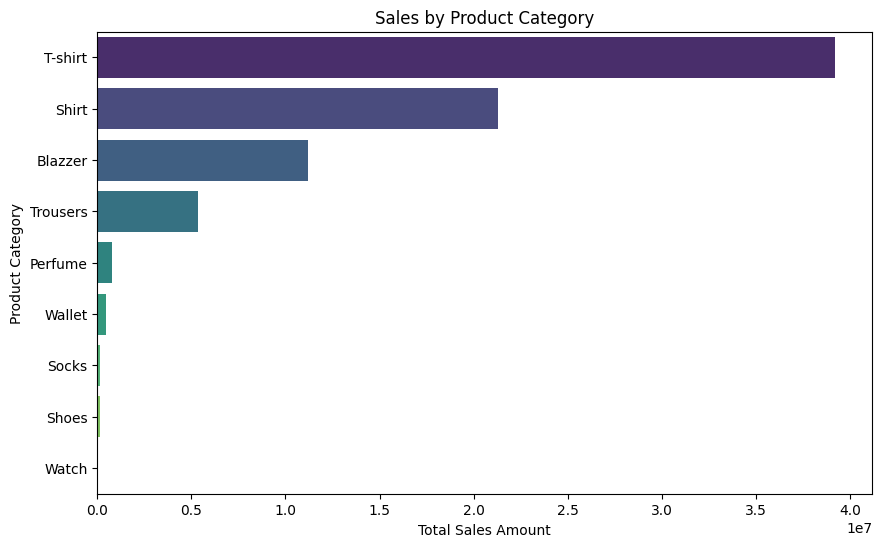

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Category', data=product_analysis, palette='viridis')
plt.title('Sales by Product Category')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Category')
plt.show()

# Visualization of Product Sizes

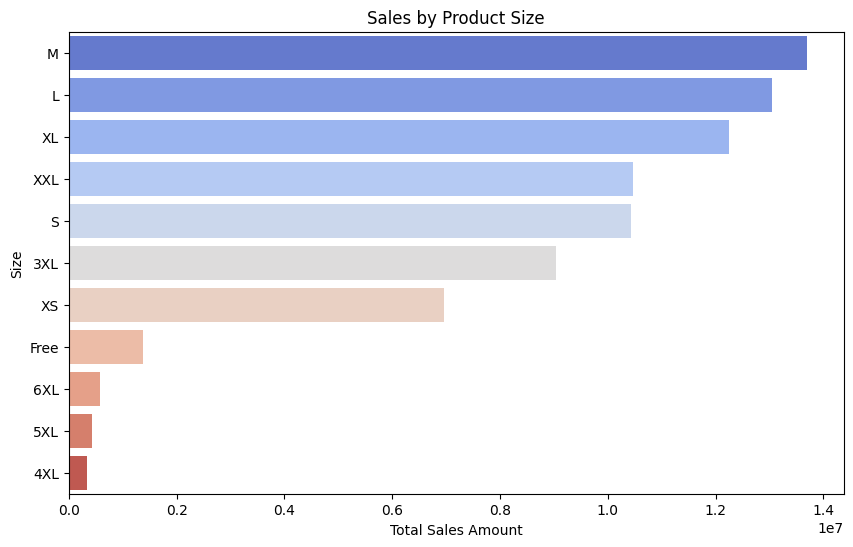

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Size', data=size_analysis, palette='coolwarm')
plt.title('Sales by Product Size')
plt.xlabel('Total Sales Amount')
plt.ylabel('Size')
plt.show()

# 3. Fulfillment Analysis
# Analyze fulfillment methods

In [42]:
fulfillment_analysis = sales_data.groupby('Fulfilment')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Visualization of Fulfillment Methods

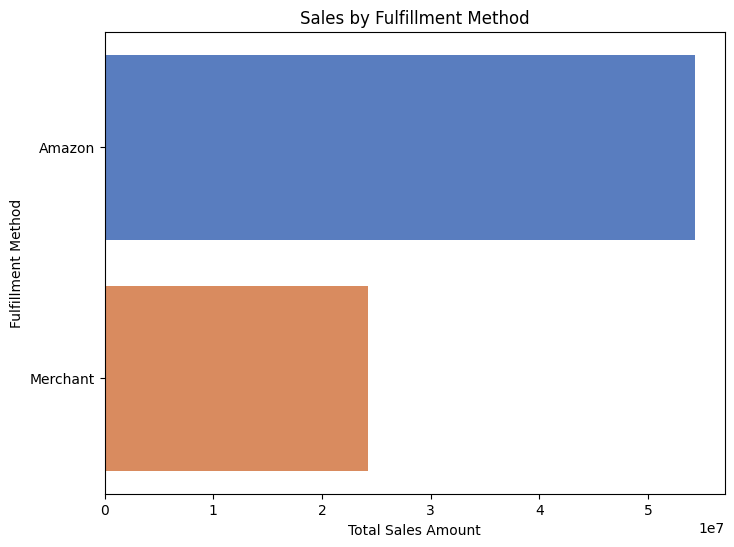

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Amount', y='Fulfilment', data=fulfillment_analysis, palette='muted')
plt.title('Sales by Fulfillment Method')
plt.xlabel('Total Sales Amount')
plt.ylabel('Fulfillment Method')
plt.show()

# 4. Customer Segmentation
# Analyze customer behavior

In [44]:
customer_data = sales_data.groupby('Order ID').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()
customer_data['Segment'] = pd.qcut(customer_data['Amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Visualization of Customer Spending

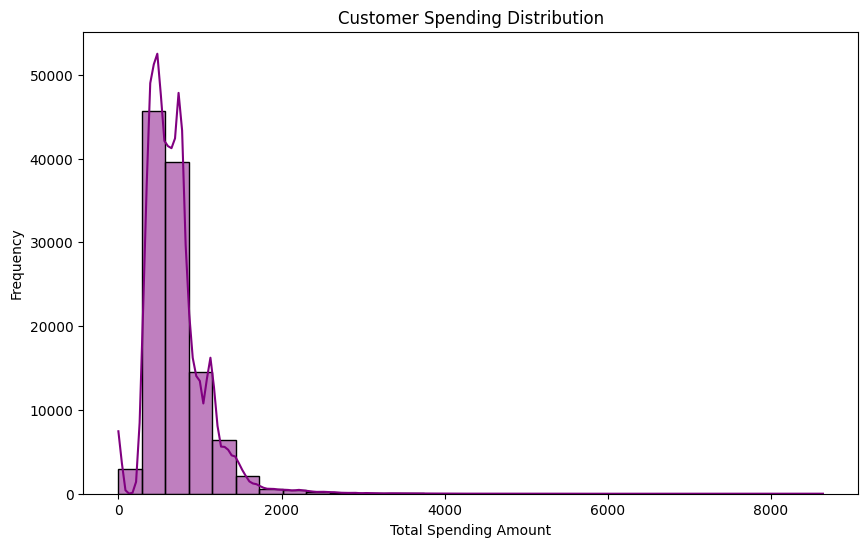

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Amount'], bins=30, kde=True, color='purple')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending Amount')
plt.ylabel('Frequency')
plt.show()

# Pie Chart for Customer Segmentation

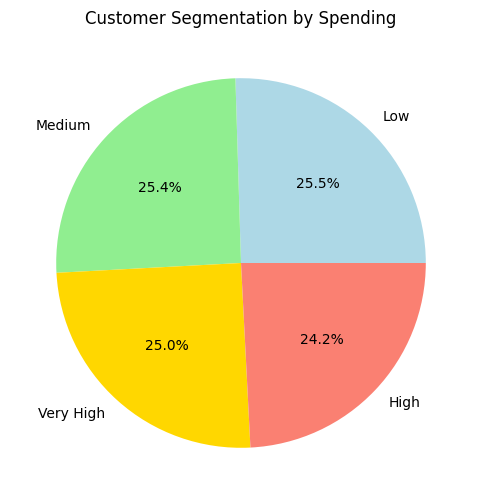

In [46]:
segment_counts = customer_data['Segment'].value_counts()
plt.figure(figsize=(8, 6))
segment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'gold', 'salmon'])
plt.title('Customer Segmentation by Spending')
plt.ylabel('')
plt.show()

# 5. Geographical Analysis
# Analyze sales by location

In [49]:
geography_analysis = sales_data.groupby(['ship-state', 'ship-city'])['Amount'].sum().reset_index()


# Visualization of Top States

In [50]:
top_states = geography_analysis.groupby('ship-state')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)

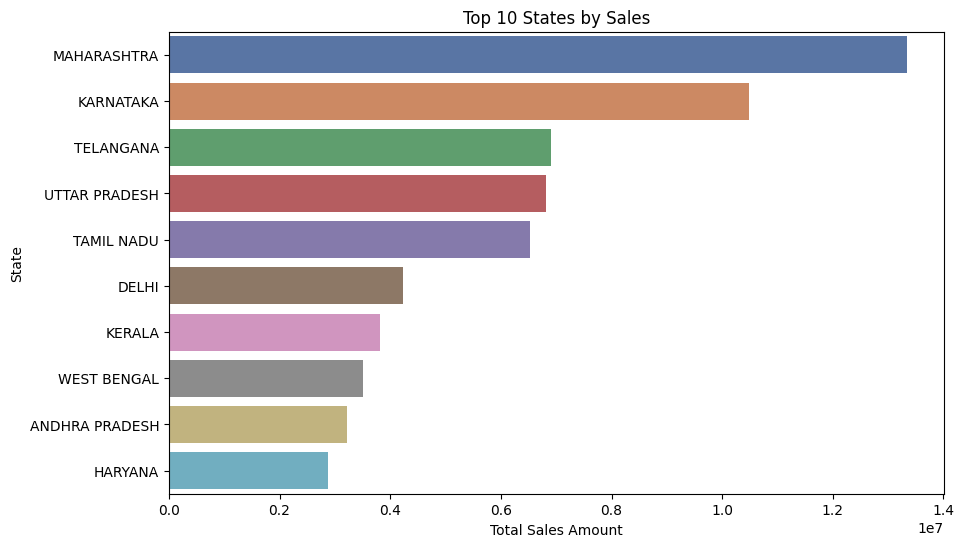

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='ship-state', data=top_states, palette='deep')
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('State')
plt.show()

# 6. Insights and Recommendations
# Key Insights

In [27]:
print("Key Insights:")
print("- Sales performance is highest during certain months/years. (Refer to trends)")
print("- Top-selling categories and sizes provide opportunities for stock prioritization.")
print("- Fulfillment methods show varied efficiency—optimize poorly performing methods.")
print("- High-value customers are a small percentage; consider loyalty programs.")
print("- Certain states/cities drive the majority of sales—target marketing efforts here.")

Key Insights:
- Sales performance is highest during certain months/years. (Refer to trends)
- Top-selling categories and sizes provide opportunities for stock prioritization.
- Fulfillment methods show varied efficiency—optimize poorly performing methods.
- High-value customers are a small percentage; consider loyalty programs.
- Certain states/cities drive the majority of sales—target marketing efforts here.


# Recommendations

In [28]:
print("\nRecommendations:")
print("1. Focus on promotional events during peak sales months to maximize revenue.")
print("2. Expand inventory for top-selling categories and sizes.")
print("3. Improve fulfillment strategies for methods with lower efficiency.")
print("4. Introduce loyalty programs or personalized offers for high-value customers.")
print("5. Enhance marketing in top-performing regions.")


Recommendations:
1. Focus on promotional events during peak sales months to maximize revenue.
2. Expand inventory for top-selling categories and sizes.
3. Improve fulfillment strategies for methods with lower efficiency.
4. Introduce loyalty programs or personalized offers for high-value customers.
5. Enhance marketing in top-performing regions.


# Machine Learning Section
# Feature Selection

In [52]:
features = ['Month', 'Year', 'Qty', 'Category', 'Size', 'Fulfilment']
data_ml = pd.get_dummies(sales_data[features + ['Amount']], drop_first=True)

# Train-test split

In [53]:
X = data_ml.drop(columns=['Amount'])
y = data_ml['Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model 

In [64]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest: RMSE = {rmse_rf}, R2 = {r2_rf}")

Random Forest: RMSE = 209.54725627641076, R2 = 0.43715732323947154


# Visualization for Random Forest

C:\Users\seaan\AppData\Local\Temp\ipykernel_170148\329203958.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


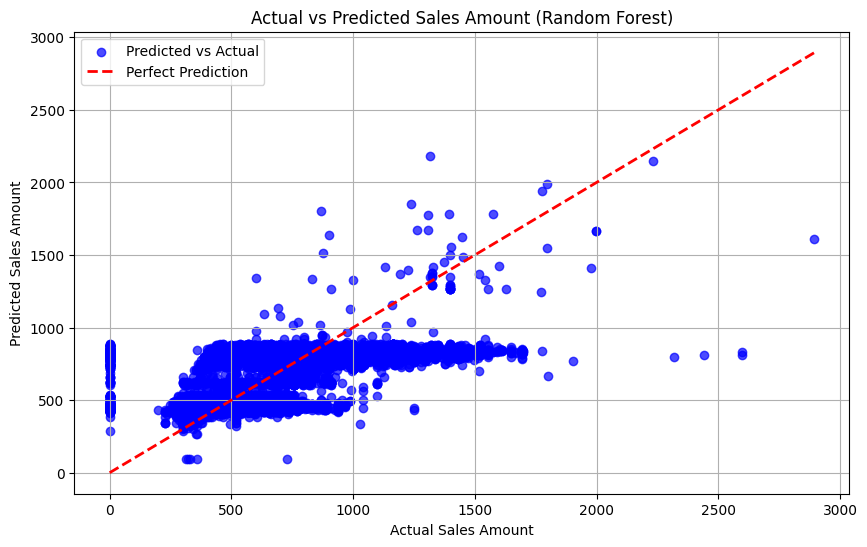

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.title("Actual vs Predicted Sales Amount (Random Forest)")
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.legend()
plt.grid()
plt.show()

# Gradient Boosting Model

In [67]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting: RMSE = {rmse_gb}, R2 = {r2_gb}")

Gradient Boosting: RMSE = 209.78667944741144, R2 = 0.43587041005273897


# Visualization for Gradient Boosting

C:\Users\seaan\AppData\Local\Temp\ipykernel_170148\3502519220.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


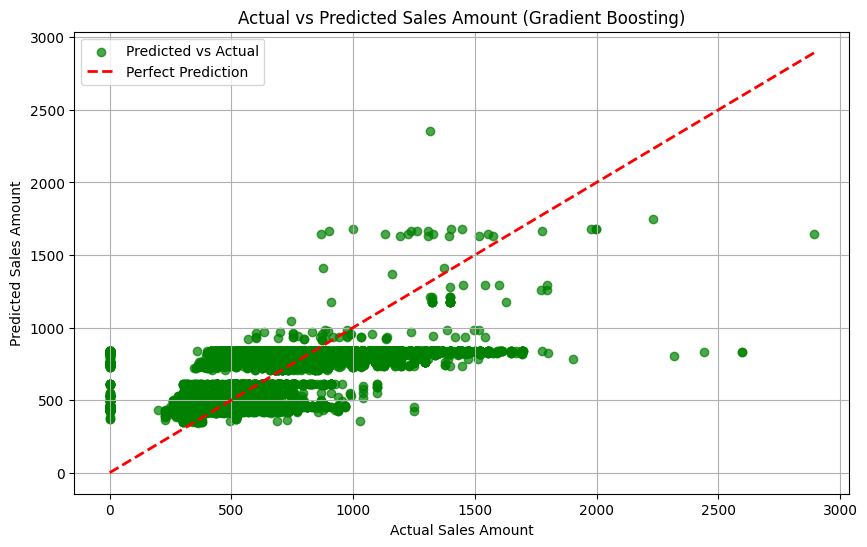

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.title("Actual vs Predicted Sales Amount (Gradient Boosting)")
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.legend()
plt.grid()
plt.show()

# Linear Regression Model

In [68]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression: RMSE = {rmse_lr}, R2 = {r2_lr}")

Linear Regression: RMSE = 212.3714176757372, R2 = 0.421883726407531


# Visualization for Linear Regression

C:\Users\seaan\AppData\Local\Temp\ipykernel_170148\516152256.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


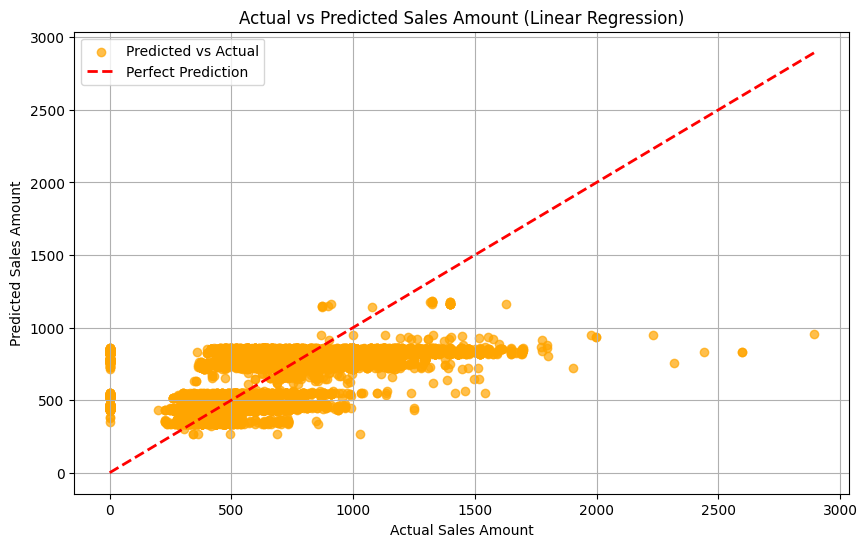

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.title("Actual vs Predicted Sales Amount (Linear Regression)")
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.legend()
plt.grid()
plt.show()

# Decision Tree Model

In [69]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree: RMSE = {rmse_dt}, R2 = {r2_dt}")

Decision Tree: RMSE = 209.67173776852252, R2 = 0.43648841152883033


# Visualization for Decision Tree

C:\Users\seaan\AppData\Local\Temp\ipykernel_170148\3627784993.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


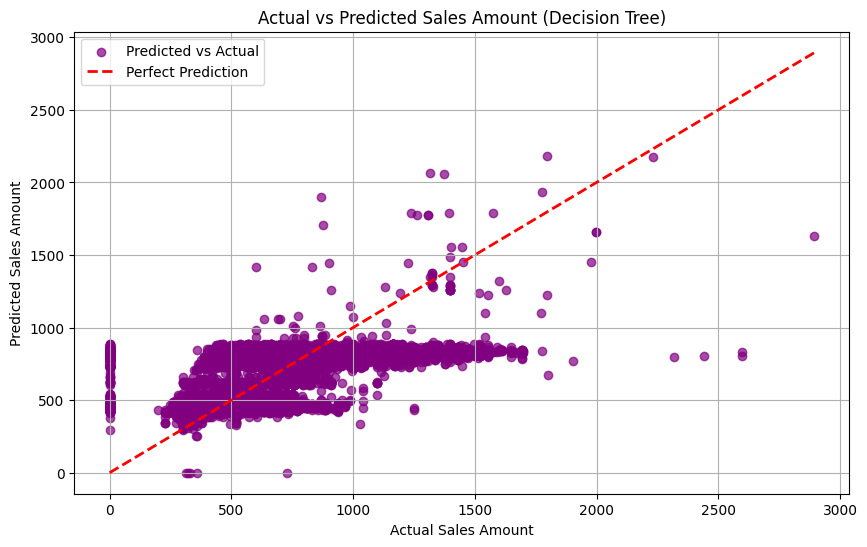

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.title("Actual vs Predicted Sales Amount (Decision Tree)")
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.legend()
plt.grid()
plt.show()

# Compare Models

In [74]:
results = {
    "Random Forest": (rmse_rf, r2_rf),
    "Gradient Boosting": (rmse_gb, r2_gb),
    "Linear Regression": (rmse_lr, r2_lr),
    "Decision Tree": (rmse_dt, r2_dt)
}

best_model = min(results, key=lambda k: results[k][0])
print(f"\nBest Model: {best_model} with RMSE = {results[best_model][0]} and R2 = {results[best_model][1]}")


Best Model: Random Forest with RMSE = 209.54725627641076 and R2 = 0.43715732323947154


# Feature Importance for Tree-based Models

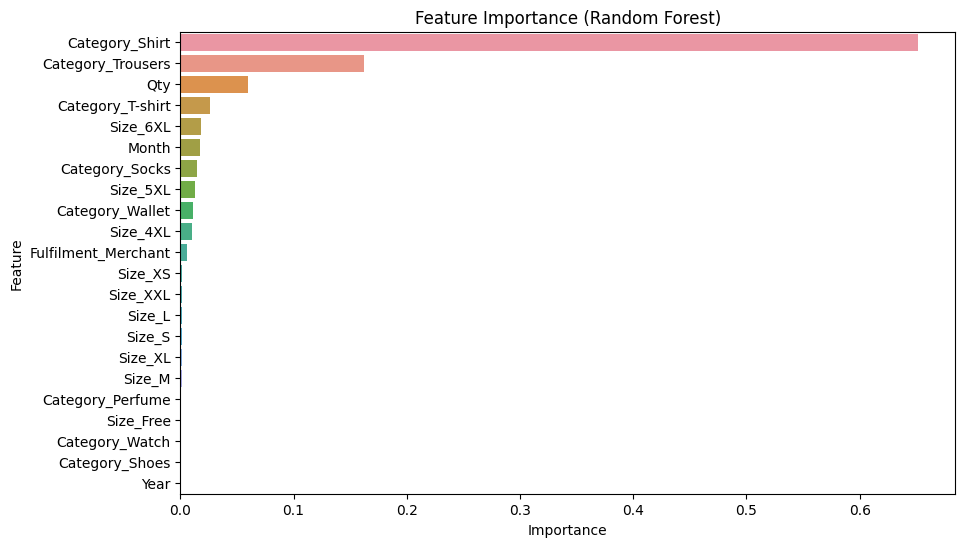

In [79]:
# Feature Importance for Tree-based Models
if best_model in ["Random Forest", "Gradient Boosting", "Decision Tree"]:
    if best_model == "Random Forest":
        importances = rf_model.feature_importances_
    elif best_model == "Gradient Boosting":
        importances = gb_model.feature_importances_
    else:
        importances = dt_model.feature_importances_

    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f"Feature Importance ({best_model})")
    plt.show()

# Predictions Visualization for the Best Model

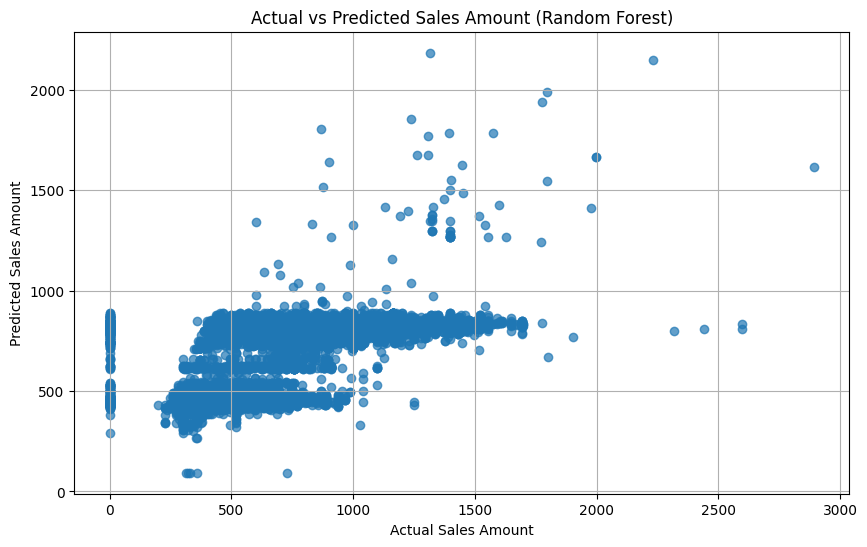

In [81]:
if best_model == "Random Forest":
    y_pred_best = y_pred_rf
elif best_model == "Gradient Boosting":
    y_pred_best = y_pred_gb
elif best_model == "Linear Regression":
    y_pred_best = y_pred_lr
else:
    y_pred_best = y_pred_dt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.title(f"Actual vs Predicted Sales Amount ({best_model})")
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.grid()
plt.show()